<a href="https://colab.research.google.com/github/ArshiAbolghasemi/AI-UT/blob/main/hidden-markov-models/speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Recognition
In this project, we will develop a speech recognition system for numbers based on **Hidden Markov Models (HMMs)**.
We have a dataset that contains records of 6 different speakers pronouncing numbers 0 to 9 in English.

# Settings And Imports

This section contains libraries and settings that are required.

## Imports

In [71]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import os
from typing import List, Dict, Any
from google.colab import drive

## Settings

In [99]:
DRIVE_MOUNTED_PATH=os.path.join(os.getcwd(), 'drive/')
AUDIOS_DATASET_PATH=os.path.join(DRIVE_MOUNTED_PATH, 'MyDrive/AI-UT/hidden-markov-models/recordings/')

N_MFCC=13
HOP_LENGTH=512

## Mountin to google drive

In [100]:
drive.mount(DRIVE_MOUNTED_PATH)

Mounted at /content/drive/


# Data Preprocessing and Feature Extracting



## Load Audios Dataset
First, let's load our audio data samples.

In [101]:
def load_audios_dataset() -> List[Dict[str, Any]]:
  audios_data = list(dict())
  for audio_file in os.listdir(AUDIOS_DATASET_PATH):
    audio_file_path = os.path.join(AUDIOS_DATASET_PATH, audio_file)
    signal, sr = librosa.load(audio_file_path)
    audios_data.append({
        'signal': signal,
        'sampling_rate': sr,
    })

  return audios_data

audios_data = load_audios_dataset()

## Segmentation

1. Does **segmentation** useful for this dataset? why?
> In the scenario you've described, segmentation would likely be very useful for various tasks such as **feature extraction**, and **noise reduction** and it helps to our **process be more efficient**.
>- **Feature Extraction**: For tasks like speech recognition or speaker identification, feature extraction is crucial. Segmenting the audio into smaller frames allows for the extraction of features such as MFCCs, which capture the spectral characteristics of speech over short time windows. By extracting features from each segment independently, you can capture the nuances of each speaker's pronunciation and speech patterns more effectively.
> - **Noise Reduction**: If the audio recordings contain background noise or interference, segmentation can aid in targeted noise reduction. By segmenting the audio into smaller frames, it becomes easier to identify and remove segments that are corrupted by noise. This improves the overall quality of the audio data and enhances the performance of downstream tasks such as speech recognition.
> - **Efficient Processing**: Processing 3000 audio files containing numerous repetitions of 0 - 9 digits pronounced by six speakers can be computationally intensive. Segmenting the audio into smaller frames allows for more efficient processing, as you can analyze smaller segments in parallel. This reduces computational requirements and facilitates faster processing of the audio data.

## Feature Extraction


### Audio Features Explaination

2. Explain each of the following terms: "MFCC," "Zero Crossing Rate," "mel-spectrogram," and "chroma features," as well as the relationships between them.
> **MFCC (Mel-frequency cepstral coefficients)**:
MFCCs are a widely used feature representation for audio signals, particularly in speech and music processing. They capture the spectral characteristics of audio signals by transforming the frequency domain representation of the signal into a compressed, decorrelated form. MFCCs are obtained by taking the Discrete Cosine Transform (DCT) of the log of the power spectrum of the signal, after mapping the frequency axis to the mel scale, which approximates the human auditory system's response to different frequencies. MFCCs are commonly used as features for tasks such as speech recognition, speaker identification, and music genre classification.<br>
> **Zero Crossing Rate**: The zero crossing rate (ZCR) is a simple feature that measures the rate at which a signal changes its sign (crosses zero) within a given time window.Higher ZCR values indicate more rapid changes in the audio signal, which may correspond to sounds with higher pitch or more rapid variations in amplitude.<br>
> **Mel-spectrogram**: A mel-spectrogram is a spectrogram where the frequency axis is converted from Hertz to the mel scale, which approximates the human auditory system's perception of pitch. A mel-spectrogram represents the time-varying frequency content of an audio signal over time.<br>
> **Chroma Features**: Chroma features represent the distribution of pitch classes (or chroma) in an audio signal, disregarding the exact frequency information. Chroma features are particularly useful for tasks where the harmonic content and tonal structure of the audio signal are important, such as music genre classification, chord recognition, and melody extraction.<br>
> Relationships between the terms:<br>
  - MFCCs, mel-spectrograms, and chroma features are all representations of audio signals commonly used in audio processing tasks.
  - Mel-spectrograms and chroma features are derived from the frequency domain representation of the audio signal, while MFCCs are derived from the mel-scaled power spectrum.
  - MFCCs capture both spectral and temporal characteristics of audio signals and are widely used as features in speech and music processing tasks.
  - Mel-spectrograms provide a perceptually relevant representation of the frequency content of audio signals, while chroma features focus on the tonal content.
  - Zero crossing rate provides information about the temporal dynamics of the audio signal and can be used in conjunction with other features to characterize audio signals further.

### MFCC
Now, let's compute MFCC for each sample

In [102]:
def compute_mfcc(audios_data: List[Dict[str, any]]) -> List[np.ndarray]:
  return list(map(
      lambda audio_data: librosa.feature.mfcc(
          y=audio_data['signal'],
          sr=audio_data['sampling_rate'],
          hop_length=HOP_LENGTH,
          n_mfcc=N_MFCC
      ),
      audios_data
  ))

mfccs = compute_mfcc(audios_data)

Here is a heatmap of the MFCCs for one of our samples.

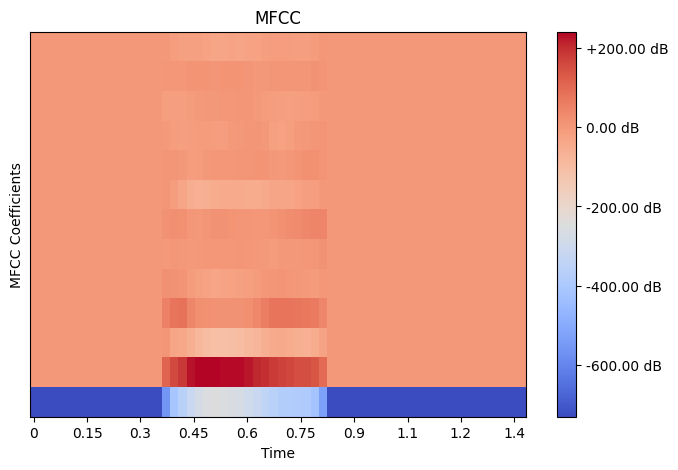

In [104]:
def display_mfcc_heat_map(mfcc: np.ndarray, audio_data: Dict[str, Any]) -> None:
  plt.figure(figsize=(8, 5))
  librosa.display.specshow(mfcc, x_axis='time', sr=audio_data["sampling_rate"])
  plt.colorbar(format=ticker.FuncFormatter(
      lambda x, pos: f'+{x:.2f} dB' if x > 0 else f'{x:.2f} dB'))
  plt.title('MFCC')
  plt.xlabel('Time')
  plt.ylabel('MFCC Coefficients')
  plt.show()

audio_data_idx = random.randint(0, len(os.listdir(AUDIOS_DATASET_PATH)) - 1)
display_mfcc_heat_map(mfccs[audio_data_idx], audios_data[audio_data_idx])